#### [Chapter 10](https://github.com/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_10.ipynb)
<!-- - [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Ziaeemehr/mndynamics/main?labpath=mndynamics%2Fexamples%2FChap_10.ipynb) -->

**The Slow-Fast Phase Plane**

- Börgers, C., 2017. An introduction to modeling neuronal dynamics (Vol. 66). Berlin: Springer.

Code by : Abolfazl Ziaeemehr ([GitHub](https://github.com/Ziaeemehr))

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mndynamics.models.py.HH_Base import HH
from mndynamics.models.py.HH_Base import HH_Reduced


In [2]:
plt.rcParams['figure.figsize'] = [6, 3.5]
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.labelsize': 16})

In [3]:
obj = HH({"v0":-20, "i_ext":10.0})
data = obj.simulate()
t = data['t']
h = data['h']
n = data['n']

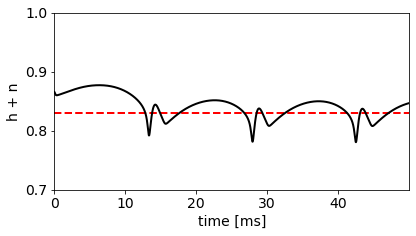

In [4]:

plt.axhline(y=0.83, ls="--", c="r", lw=2)
plt.plot(t, h + n, lw=2, c="k")
plt.xlim(min(t), max(t))
plt.ylim(0.7, 1)
plt.xlabel("time [ms]", fontsize=14)
plt.ylabel("h + n", fontsize=14)
plt.tight_layout()
plt.tick_params(labelsize=14)

In [5]:
obj = HH_Reduced({"v0":-20, "i_ext":10.0})
data = obj.simulate()
t = data['t']
v = data['v']
h = data['h']
n = data['n']
m = data['m']

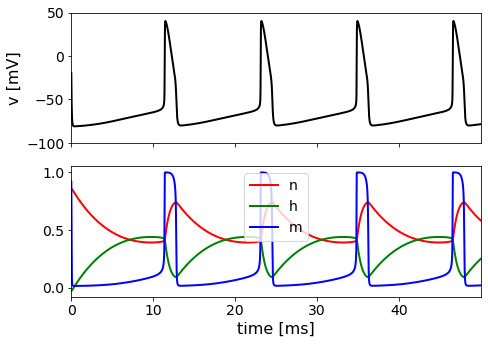

In [6]:
fig, ax = plt.subplots(2, figsize=(7, 5), sharex=True)

ax[0].plot(t, v, lw=2, c="k")
ax[1].plot(t, n, lw=2, c="r", label="n")
ax[1].plot(t, 0.83 - n, lw=2, c="g", label="h")
ax[1].plot(t, m, lw=2, c="b", label="m")

ax[0].set_xlim(min(t), max(t))
ax[0].set_ylim(-100, 50)
# ax[1].set_ylim(0, 1)
ax[1].set_xlabel("time [ms]")
ax[0].set_ylabel("v [mV]")
ax[1].legend()
plt.tight_layout()
plt.tick_params(labelsize=14)
plt.tight_layout()

In [7]:
def v_null(v_vec):
    """
    v nullcline of the HH model
    where dv/dt = 0 which is defined by
    gNa*m_inf(v)^3*(0.83 - n)(vNa - v)+ gK * n^4(vK - v)+ gL(vL - v)+ I = 0
    """

    obj = HH({"v0": -20, "i_ext": 10.0})
    g_na = obj.g_na
    v_na = obj.v_na
    g_k = obj.g_k
    v_k = obj.v_k
    g_l = obj.g_l
    v_l = obj.v_l
    i_ext = obj.i_ext
    m_inf = obj.m_inf
    n_vec = np.zeros(len(v_vec))

    for ij in range(len(v_vec)):
        v = v_vec[ij]
        n_L = 0
        n_R = 1
        while n_R-n_L > 1e-9:
            n = (n_L+n_R)/2
            i_ion = g_na*m_inf(v)**3*(0.83-n)*(v_na-v)+g_k * \
                n**4*(v_k-v)+g_l*(v_l-v)+i_ext
            if i_ion < 0:
                n_R = n
            else:
                n_L = n
        n_vec[ij] = (n_L+n_R)/2
        if n_vec[ij] > 1-1e-9:
            n_vec[ij] = 2
        if n_vec[ij] < 1e-9:
            n_vec[ij] = -1
    return n_vec


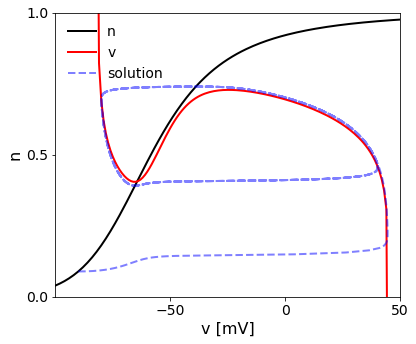

In [8]:
fig, ax = plt.subplots(1, figsize=(6, 5))

v = np.arange(-100, 51, 1.0) + 0.01
ax.plot(v, obj.alpha_n(v)/(obj.alpha_n(v)+obj.beta_n(v)),
        lw=2, c="k", label="n")
ax.margins(0)
ax.set_xlabel("v [mV]")
ax.set_ylabel("n")
ax.set_xticks(np.arange(-100, 51, 50).tolist())
ax.set_yticks([0, 0.5, 1])
ax.set_ylim([0,1])


n_vec = v_null(v)
ax.plot(v, n_vec, lw=2, c="r", label="v")


obj = HH_Reduced({"v0": -90, "i_ext": 10.0})
data = obj.simulate()
v = data['v']
n = data['n']

ax.plot(v, n, lw=2, ls="--", c="b", label="solution", alpha=0.5)

ax.legend(frameon=False, fontsize=14)
plt.tight_layout()

5000 5000


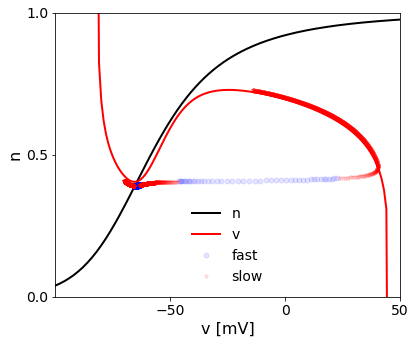

In [36]:
fig, ax = plt.subplots(1, figsize=(6, 5))

v = np.arange(-100, 51, 1.0) + 0.01
ax.plot(v, obj.alpha_n(v)/(obj.alpha_n(v)+obj.beta_n(v)),
        lw=2, c="k", label="n")
ax.margins(0)
ax.set_xlabel("v [mV]")
ax.set_ylabel("n")
ax.set_xticks(np.arange(-100, 51, 50).tolist())
ax.set_yticks([0, 0.5, 1])
ax.set_ylim([0,1])

n_vec = v_null(v)
ax.plot(v, n_vec, lw=2, c="r", label="v")


obj = HH_Reduced({"v0": -90, "i_ext": 10.0, "dt":0.001, "t_end": 15})
data = obj.simulate()
v = data['v']
n = data['n']
t = data['t']
speed = np.sqrt((v/150)**2 + (n/0.35)**2)
m_steps = len(v)
n_start=int(2/3*m_steps)

t = t[n_start:]
v = v[n_start:]
n = n[n_start:]
speed = speed[n_start:]

thr = 0.02 * np.max(speed)
thr = 1.2
ind_down = speed < thr
ax.plot(v[ind_down], n[ind_down], "bo", ms=5, alpha=0.1, label="fast")

ind_up = speed >= thr
ax.plot(v[ind_up], n[ind_up], "r*", ms=5, alpha=0.1, label="slow")

print(len(ind_down), len(ind_up))

ax.legend(frameon=False, fontsize=14)
plt.tight_layout()

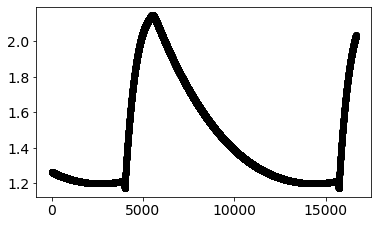

In [12]:
plt.plot(speed, "ko")